# Beginner Level Task
## Task 1: Exploratory Sales Analysis

-  Perform exploratory data analysis (EDA) on sales data 
to understand trends, seasonality, and missing values

### Step:1 Import libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


### Step:2 Load the Dataset

In [60]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\train.csv")
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


## DataExploration
- Understand the given data clearly

In [62]:
# number of rows and column 
df.shape

(3000888, 6)

In [63]:
# no.of entries in dataset
df.size

18005328

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


## Step:3 Data Cleaning
- Convert date column to datetime
- Check missing values

In [66]:
#convert date column
df['date']=pd.to_datetime(df['date'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [68]:
#Check missing values
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

- In the dataset their is no missing values.

## Step:4 Discriptive Statistics

In [71]:
#Quick Statistics summary
df['sales'].describe()

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

In [72]:
print("Mean sales:",df['sales'].mean())
print("Median sales:",df['sales'].median())
print("Mode sales:",df['sales'].mode()[0])

Mean sales: 357.77574911261894
Median sales: 11.0
Mode sales: 0.0


## Step:5 Sales trend over time

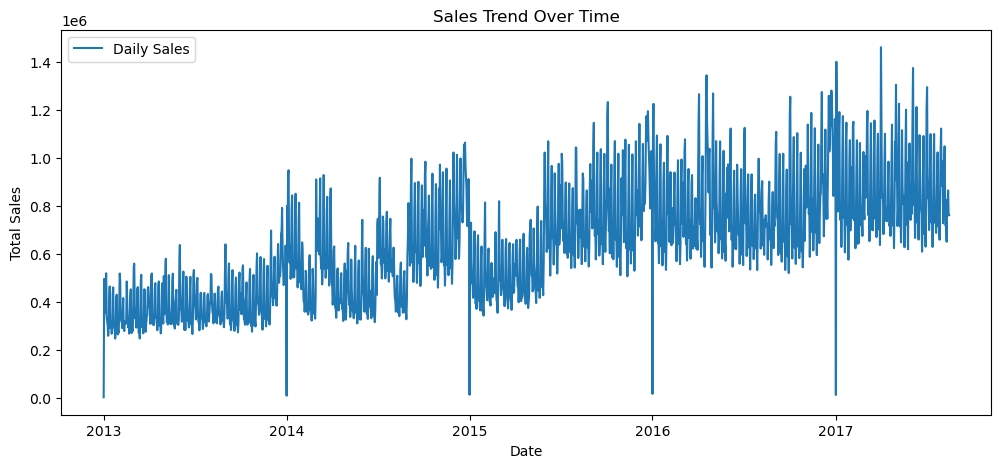

In [74]:
# Aggregate daily sales
daily_sales = df.groupby('date')['sales'].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values, label="Daily Sales")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()                         

## Step:6 Monthly/Yearly Seasonality

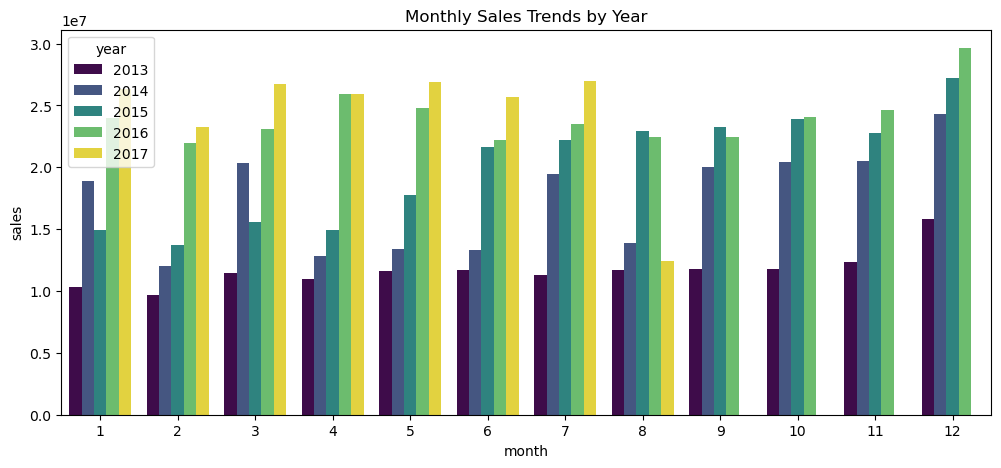

In [76]:
#Extract month and year
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

# Monthly sales
monthly_sales = df.groupby(['year','month'])['sales'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x='month',y='sales',hue='year' , data=monthly_sales,palette='viridis')
plt.title("Monthly Sales Trends by Year")
plt.show()

## Step 7:Additional Insights
- Top selling product families
- Store-wise sales

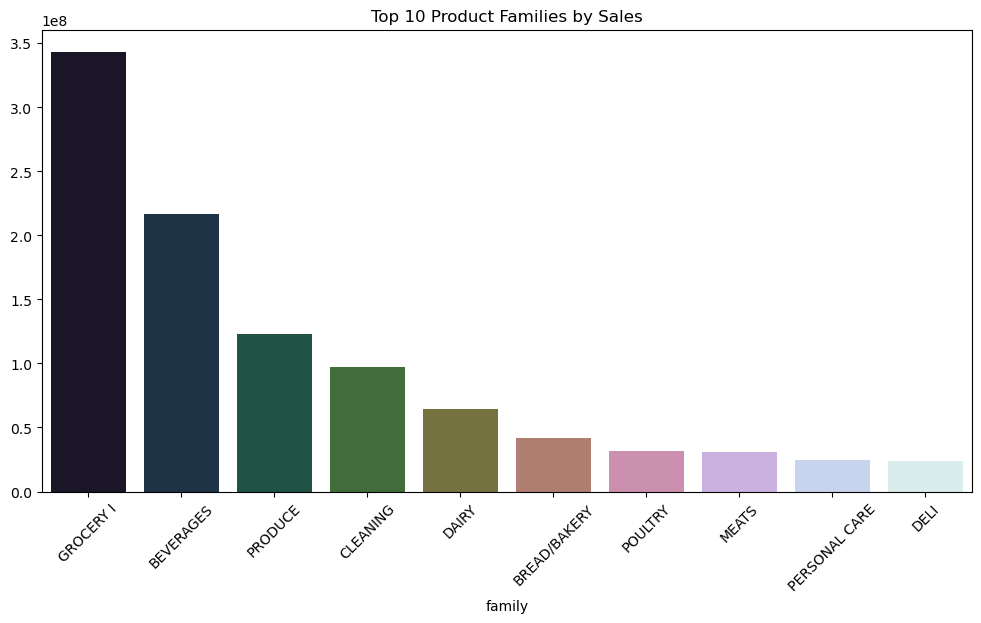

In [78]:
# Top product families
top_families = df.groupby('family')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_families.index, y=top_families.values, palette="cubehelix")
plt.xticks(rotation=45)
plt.title("Top 10 Product Families by Sales")
plt.show()


#### 📊 Learning Outcomes

1.Learned data cleaning (duplicates, missing values).

2.Generated summary statistics (mean, median, mode, describe).

3.Visualized sales trends, seasonality, weekday patterns.

4.Understood how EDA reveals insights before modeling.

# Task 2: Simple Sales Forecast with Moving Average
- Implement a basic forecasting method using moving 
averages.
 

### 2.1 Compute rolling averages for weekly and monthly sales.

In [81]:
# Aggregate to daily total sales
daily_sales = df.groupby('date')['sales'].sum().reset_index()
daily_sales.head()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


Now we have total sales per day.

### 2.2Compute Rolling Averages

In [84]:
# 7-day (weekly) moving average
daily_sales['7d_MA'] = daily_sales['sales'].rolling(window=7).mean()

# 30-day (monthly) moving average
daily_sales['30d_MA'] = daily_sales['sales'].rolling(window=30).mean()


This smooths the sales data and acts as a simple forecast/trend indicator.

### 2.3 Compare Actual vs. Forecast

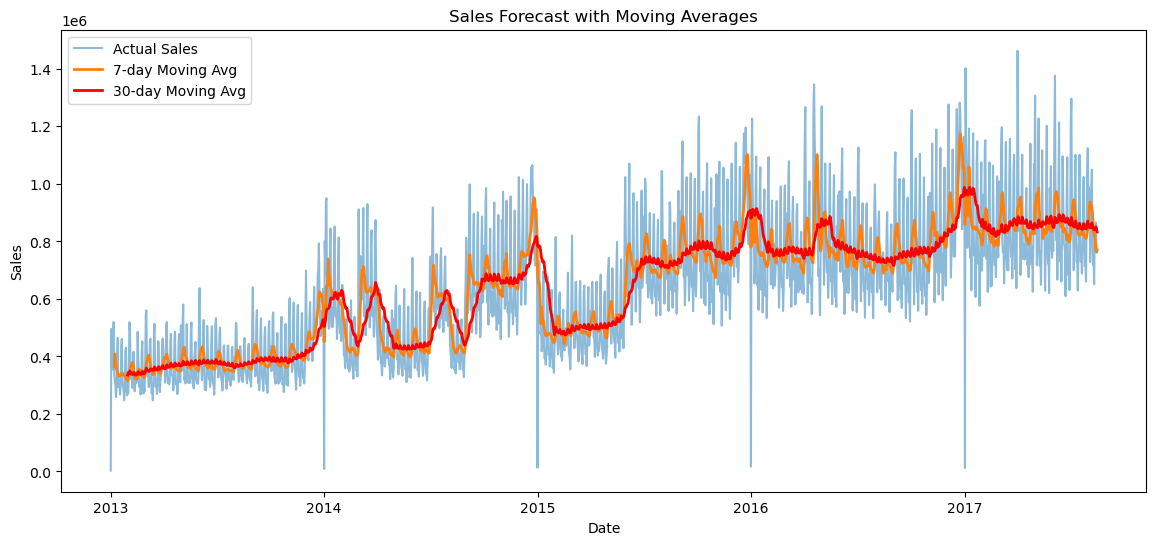

In [87]:
plt.figure(figsize=(14,6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Actual Sales', alpha=0.5)
plt.plot(daily_sales['date'], daily_sales['7d_MA'], label='7-day Moving Avg', linewidth=2)
plt.plot(daily_sales['date'], daily_sales['30d_MA'], label='30-day Moving Avg', linewidth=2, color='red')
plt.title("Sales Forecast with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


- Actual sales (noisy)

- 7-day moving average (short-term trend)

- 30-day moving average (long-term trend)

### 2.4 Simple Forecast Evaluation
We can shift the moving average forward by 1 day to use as a forecast.

In [90]:
# Forecast: yesterday’s moving average predicts today
daily_sales['7d_forecast'] = daily_sales['7d_MA'].shift(1)
daily_sales['30d_forecast'] = daily_sales['30d_MA'].shift(1)

#compare forecast vs. actual.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Drop NaNs
eval_data = daily_sales.dropna()

mse_7 = mean_squared_error(eval_data['sales'], eval_data['7d_forecast'])
mae_7 = mean_absolute_error(eval_data['sales'], eval_data['7d_forecast'])

mse_30 = mean_squared_error(eval_data['sales'], eval_data['30d_forecast'])
mae_30 = mean_absolute_error(eval_data['sales'], eval_data['30d_forecast'])

print("7-day MA Forecast → MSE:", round(mse_7,2), " MAE:", round(mae_7,2))
print("30-day MA Forecast → MSE:", round(mse_30,2), " MAE:", round(mae_30,2))


7-day MA Forecast → MSE: 22002039911.56  MAE: 114467.17
30-day MA Forecast → MSE: 23944927797.89  MAE: 120020.35


- This gives a basic forecast accuracy comparison.

#### 📊 Learning Outcomes

1.Learned how to compute rolling averages for smoothing trends.

2.Understood how weekly/monthly patterns help in forecasting.

3.Implemented a naïve moving average forecast.

4.Evaluated performance with RMSE & MAE.

# INTERMEDIATE LEVEL TASK
## task:1 Feature Engineering for Sales Data
-  Create new features to improve prediction accuracy.

In [120]:
print(df.head())
print(df.info())

   id       date  store_nbr      family  sales  onpromotion  month  year  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0      1  2013    1   
1   1 2013-01-01          1   BABY CARE    0.0            0      1  2013    1   
2   2 2013-01-01          1      BEAUTY    0.0            0      1  2013    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0      1  2013    1   
4   4 2013-01-01          1       BOOKS    0.0            0      1  2013    1   

   weekday  weekofyear  
0        1           1  
1        1           1  
2        1           1  
3        1           1  
4        1           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  i

### Extract Date-Based Features

In [114]:
# Extract year, month, day, weekday
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["weekday"] = df["date"].dt.weekday  # 0=Monday, 6=Sunday
df["weekofyear"] = df["date"].dt.isocalendar().week.astype(int)


- These help capture seasonality & trends

### Weekend & Holiday Flags

In [127]:
# Weekend flag
df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

# Holiday flag (using Kaggle's oil/holiday dataset if available, else custom list)
holidays = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\holidays_events.csv", parse_dates=["date"])
df = df.merge(holidays[["date", "type"]], on="date", how="left")
df["is_holiday"] = df["type"].notnull().astype(int)


- Useful for modeling dips/spikes in sales.

### Lag Features (Previous Sales)

In [131]:
# Sort for lag creation
df = df.sort_values(by=["store_nbr", "family", "date"])

# Lag features
df["lag_7"] = df.groupby(["store_nbr", "family"])["sales"].shift(7)   # previous week
df["lag_30"] = df.groupby(["store_nbr", "family"])["sales"].shift(30) # previous month

# Rolling averages
df["rolling_mean_7"] = df.groupby(["store_nbr", "family"])["sales"].shift(1).rolling(7).mean()
df["rolling_mean_30"] = df.groupby(["store_nbr", "family"])["sales"].shift(1).rolling(30).mean()


- Captures temporal dependency of sales.

### Promotions & Extra Features

In [135]:
# Promotion flag is already available ("onpromotion")
df["promo_flag"] = (df["onpromotion"] > 0).astype(int)

# Interaction features
df["month_promo_ratio"] = df.groupby(["store_nbr", "family", "month"])["onpromotion"].transform("mean")


### Final Clean Dataset

In [138]:
# Drop NA values created by lagging
df = df.dropna().reset_index(drop=True)
print(df.head())


       id       date  store_nbr      family  sales  onpromotion  month  year  \
0   73062 2013-02-11          1  AUTOMOTIVE    0.0            0      2  2013   
1   74844 2013-02-12          1  AUTOMOTIVE    0.0            0      2  2013   
2  106920 2013-03-02          1  AUTOMOTIVE    1.0            0      3  2013   
3  160380 2013-04-01          1  AUTOMOTIVE    0.0            0      4  2013   
4  179982 2013-04-12          1  AUTOMOTIVE    3.0            0      4  2013   

   day  weekday  weekofyear  is_weekend     type  is_holiday  lag_7  lag_30  \
0   11        0           7           0  Holiday           1    5.0     2.0   
1   12        1           7           0  Holiday           1    0.0     2.0   
2    2        5           9           1  Holiday           1    4.0     0.0   
3    1        0          14           0  Holiday           1    4.0     1.0   
4   12        4          15           0  Holiday           1    2.0     2.0   

   rolling_mean_7  rolling_mean_30  promo_fl

#### 📊 Learning Outcomes

1.Extracted date-based features (year, month, weekday, weekofyear).

2.Added flags (weekend, holiday).

3.Created lag features (previous 7 & 30 days).

4.Built rolling averages (trend smoothing).

5.Prepared dataset ready for regression & forecasting models.

## Task 2:Multiple Regression Model
- Build a multiple regression model using all engineered 
features.es
 

In [143]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


### Select Features & Target

In [146]:
# Features
feature_cols = [
    "onpromotion", "is_holiday", "is_weekend", 
    "year", "month", "weekday", "lag_7", "lag_30", 
    "rolling_mean_7", "rolling_mean_30"
]

X = df[feature_cols]
y = df["sales"]


### Train-Test Split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # keep time order
)


### Train Multiple Regression Model

In [152]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Make Predictions

In [155]:
y_pred = model.predict(X_test)


### Evaluate Model

In [158]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 726.53
MAE: 195.11


### Check Feature Importance (Coefficients)

In [161]:
coef_df = pd.DataFrame({
    "Feature": feature_cols,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)


           Feature   Coefficient
2       is_weekend  1.093269e+02
0      onpromotion  5.149712e+00
4            month  5.089414e+00
8   rolling_mean_7  5.310278e-01
9  rolling_mean_30  2.052539e-01
6            lag_7  1.231925e-01
7           lag_30  1.130186e-01
1       is_holiday  1.767420e-12
3             year -4.544465e+00
5          weekday -1.313479e+01


### Learning Outcomes

- Multiple Regression = predicts sales using multiple features (promotion, holidays, weekends, lags).

- Coefficients tell how each feature impacts sales.

- Evaluation Metrics:

- RMSE (Root Mean Squared Error) → penalizes large errors more.

- MAE (Mean Absolute Error) → average absolute deviation.

- Learned how engineered features improve regression accuracy compared to raw sales data.

## ADVANCED LEVEL TASK
###  Task 1: Regularized Regression (Ridge/Lasso)
- Apply Ridge and Lasso regression to improve 
forecasting 

In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error


### Prepared Data

- Here we assume you already created engineered features (from previous task).

In [170]:


# Features and target
feature_cols = [
    "onpromotion", "is_holiday", "is_weekend",
    "year", "month", "weekday", "lag_7", "lag_30",
    "rolling_mean_7", "rolling_mean_30"
]
X = df[feature_cols]
y = df["sales"]


#### Train-Test Split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


### Baseline: Linear Regression

In [178]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression → RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}")


Linear Regression → RMSE: 726.53, MAE: 195.11


### Ridge Regression

In [181]:
ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge Regression → RMSE: {rmse_ridge:.2f}, MAE: {mae_ridge:.2f}")


Ridge Regression → RMSE: 726.53, MAE: 195.11


### Lasso Regression

In [187]:





lasso = Lasso(alpha=0.001)  # small alpha to avoid zeroing all features
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"Lasso Regression → RMSE: {rmse_lasso:.2f}, MAE: {mae_lasso:.2f}")


Lasso Regression → RMSE: 726.53, MAE: 195.11


### Compare Feature Importance

In [190]:

coef_df = pd.DataFrame({
    "Feature": feature_cols,
    "Linear": lr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

print(coef_df)

           Feature        Linear       Ridge       Lasso
0      onpromotion  5.149712e+00    5.149708    5.149671
1       is_holiday  1.767420e-12    0.000000    0.000000
2       is_weekend  1.093269e+02  109.323329  109.312243
3             year -4.544465e+00   -4.544512   -4.544075
4            month  5.089414e+00    5.089402    5.089333
5          weekday -1.313479e+01  -13.134171  -13.132030
6            lag_7  1.231925e-01    0.123193    0.123193
7           lag_30  1.130186e-01    0.113019    0.113019
8   rolling_mean_7  5.310278e-01    0.531028    0.531027
9  rolling_mean_30  2.052539e-01    0.205254    0.205253


#### 📊 Learning Outcomes

1.Linear vs Ridge vs Lasso

- Linear regression may overfit when features are correlated.

- Ridge shrinks coefficients but keeps all features.

- Lasso can shrink some coefficients to zero → feature selection.

2.Why Regularization?

- Avoids overfitting by penalizing large coefficients.

- Improves generalization to unseen sales data.

3.Interpretation

- Coefficients tell which features matter most (e.g., lag features usually dominate sales forecasting).

- Lasso can help identify the most important predictors by removing weak ones.

### Task 2: Regression with External Data
-  Enhance forecasts using additional external datasets.

In [197]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


### 2. Load Core Dataset

In [200]:

# Sales data
sales = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\train.csv", parse_dates=["date"])


### 3. Load External Datasets

In [203]:


# Oil prices
oil = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\oil.csv", parse_dates=["date"])
oil = oil.fillna(method="ffill")  # fill missing values

# Holidays
holidays = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\holidays_events.csv", parse_dates=["date"])
holidays["is_holiday"] = 1
holidays = holidays[["date", "is_holiday"]].drop_duplicates()

###  4. Merge External Data

In [208]:

# Merge oil & holiday data into sales
df = sales.merge(oil, on="date", how="left")
df = df.merge(holidays, on="date", how="left")

# Fill NA holiday flags with 0
df["is_holiday"] = df["is_holiday"].fillna(0)


### 5. Feature Engineering

In [211]:


#Add date-related and lag features (from earlier tasks):

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["weekday"] = df["date"].dt.weekday
df["is_weekend"] = df["weekday"].isin([5,6]).astype(int)

# Lag feature
df = df.sort_values(by=["store_nbr","family","date"])
df["lag_7"] = df.groupby(["store_nbr","family"])["sales"].shift(7)
df["lag_30"] = df.groupby(["store_nbr","family"])["sales"].shift(30)




In [213]:
#Drop NA created by lags:

df = df.dropna().reset_index(drop=True)

### 6. Prepare Features & Target

In [216]:

feature_cols = [
    "onpromotion", "is_holiday", "is_weekend",
    "year", "month", "weekday", 
    "lag_7", "lag_30", 
    "dcoilwtico"   # oil price
]

X = df[feature_cols]
y = df["sales"]

### 7. Train-Test Split

In [219]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


### 8. Train Regression Model

In [222]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



## 9. Evaluate Model

In [225]:



rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 488.99
MAE: 120.06


### 10. Compare with Baseline (No External Data)

- Train one model without oil & holiday features, compare errors.
- If RMSE/MAE drops, it shows external factors improved predictions.

#### 📊 Learning Outcomes

1.Learned how to merge external data (oil prices, holidays) with core sales dataset.

2.Saw how economic conditions & holidays affect sales.

3.Understood how external data reduces forecasting error (RMSE/MAE).

4.Learned that combining domain knowledge + external signals → stronger models.